Ροδάνθη Αλεξίου - Α.Μ. : 1115201900007 

Χριστίνα Ιακωβίδου - Α.Μ. : 111201900064

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# Φόρτωμα CSV αρχείου
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Βλέπουμε τα δεδομένα
print(df.head())  # Βλέπουμε τις πρώτες 5 γραμμές
print(df.info())  # Παίρνουμε τους τύπους των δεδομένων και πληροφορίες για τα null values
print(df.describe())  # Βλέπουμε τα στατιστικά των δεδομένων

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [54]:
#1. 

# Έλεγχος για τιμ΄ές που λείπουν στα δεδομένα
missing_values = df.isnull().sum()
print(missing_values)

# Διαγραφή των σειρών με τις μη υπάρχουσες τιμές (NaN)
df = df.dropna()  

# Μετατροπή στηλών που αφορούν ημερομηνίες σε DateTime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')  # Υποθέτοντας ότι η μορφή ημερομηνίας είναι ημέρα-μήνας-έτος

#Το βάζουμε σε σχόλια γιατί το υλοποιούμε στο ερώτημα 7
# Μετατροπή object σε αριθμητικές τιμές
# df['Education'] = pd.to_numeric(df['Education'], errors='coerce')  # Μετατροπή στήλης 'Education' σε αριθμητική, με NaN για μη αριθμητικές τιμές

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


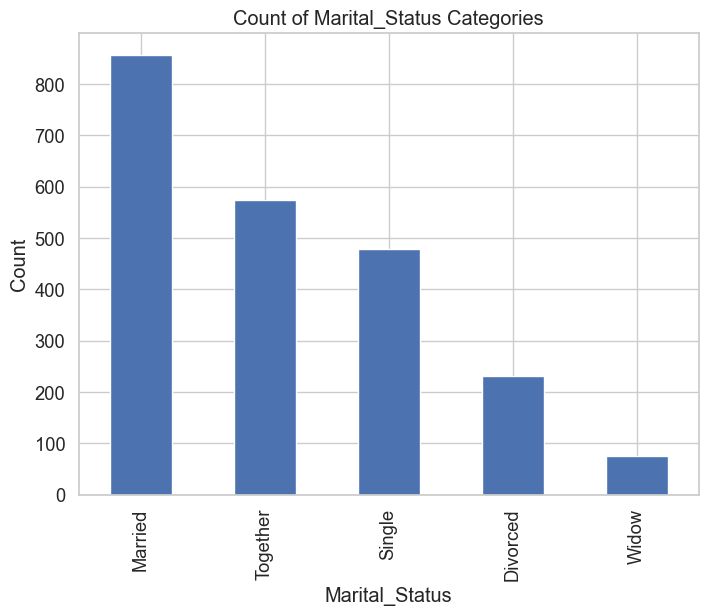

In [55]:
#2.

# Εκτύπωση των μοναδικών τιμών στις στήλες 'Marital_Status' και 'Education' 
print(df['Marital_Status'].unique()) 
print(df['Education'].unique())

# Αντικατάσταση συγκεκριμένων τιμών στην στήλη 'Marital_Status'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')

# Καταμέτρηση τιμών σε κάθε κατηγορία χρησιμοποιώντας ραβδόγραμμα
plt.figure(figsize=(8, 6))
df['Marital_Status'].value_counts().plot(kind='bar')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Count of Marital_Status Categories')
plt.show()

In [56]:
#3.

# Μετατροπή στήλης 'Dt_Customer' σε to DateTime objects
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Recency'] = pd.to_datetime(df['Recency'])

# Υπολογίσμός του χαρακτηριστικού "Customer_For" ως αριθμός ημερών από την τελευταία καταγεγραμμένη ημερομηνία (Recency)
last_date = df['Recency'].max()
df['Customer_For'] = (last_date - df['Recency']).dt.days

# Υπολογισμός 'Age' με βάση το 'Year_Birth'
current_year = dt.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Υπολογισμός 'Spent' ως το συνολικό ποσό που ξόδεψε ο πελάτης σε όλες τις κατηγορίες σε διάστημα δύο ετών
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
              df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Δημιουργία χαρακτηριστικού 'Children' ως  το σύνολο των παιδιών σε ένα νοικοκυριό, δηλαδή τα παιδιά και τους εφήβους
df['Children'] = df['Kidhome'] + df['Teenhome']

# Δημιουργία 'Family_Size' ως ο συνολικός αριθμός των ατόμων σε ένα νοικοκυριό
df['Family_Size'] = df['Children'] + 1

# Δημιουργία 'Is_Parent' για να δούμε αν ένας πελάτης είναι γονέας ή όχι
df['Is_Parent'] = df['Children'].apply(lambda x: True if x > 0 else False)

# Δημιουργία 'Living_With' για την εξαγωγή της κατάστασης διαβίωσης των ζευγαριών
df['Living_With'] = df['Marital_Status'].apply(lambda x: 'Partner' if 'together' in x.lower() else 'Alone')

# Δημιουργία 'Age_Group' για την ομαδοποιήση των ηλικιών σε προκαθορισμένες ομάδες
bins = [20, 30, 40, 50, 60, 70, 80, 200]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Εκτ΄ύπωση του ανανεωμένου dataframe
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer                       Recency  MntWines  ...  Z_Revenue  \
0  2012-09-04 1970-01-01 00:00:00.000000058       635  ...         11   
1  2014-03-08 1970-01-01 00:00:00.000000038        11  ...         11   
2  2013-08-21 1970-01-01 00:00:00.000000026       426  ...         11   
3  2014-02-10 1970-01-01 00:00:00.000000026        11  ...         11   
4  2014-01-19 1970-01-01 00:00:00.000000094       173  ...         11   

   Response  Customer_For  Age  Spent  Children  Family_Size  Is_Parent  \
0         1      

In [57]:
# 4.

# Θα ελέγξουμε τις ακραίες τιμές στις στήλες 'Age', 'Spent' και 'Income'
cat_cols = ['Age', 'Spent', 'Income']
for column_name in cat_cols:

    # Υπολογισμός του IQR (Interquartile Range)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Ορίζουμε τα  the άνω και κάτω όρια των ακραίων τιμών
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Αναγνωρίζουμε τις σειρές με τις ακραίες τιμές
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Διαγραφή των σειρών αυτών από το dataframe
    df = df[~((df[column_name] < lower_bound) | (df[column_name] > upper_bound))]

# Εκτύπωση των ανανεωμένων δεδομένων μετά την αφαίρεση των ακραίων τιμών
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer                       Recency  MntWines  ...  Z_Revenue  \
0  2012-09-04 1970-01-01 00:00:00.000000058       635  ...         11   
1  2014-03-08 1970-01-01 00:00:00.000000038        11  ...         11   
2  2013-08-21 1970-01-01 00:00:00.000000026       426  ...         11   
3  2014-02-10 1970-01-01 00:00:00.000000026        11  ...         11   
4  2014-01-19 1970-01-01 00:00:00.000000094       173  ...         11   

   Response  Customer_For  Age  Spent  Children  Family_Size  Is_Parent  \
0         1      

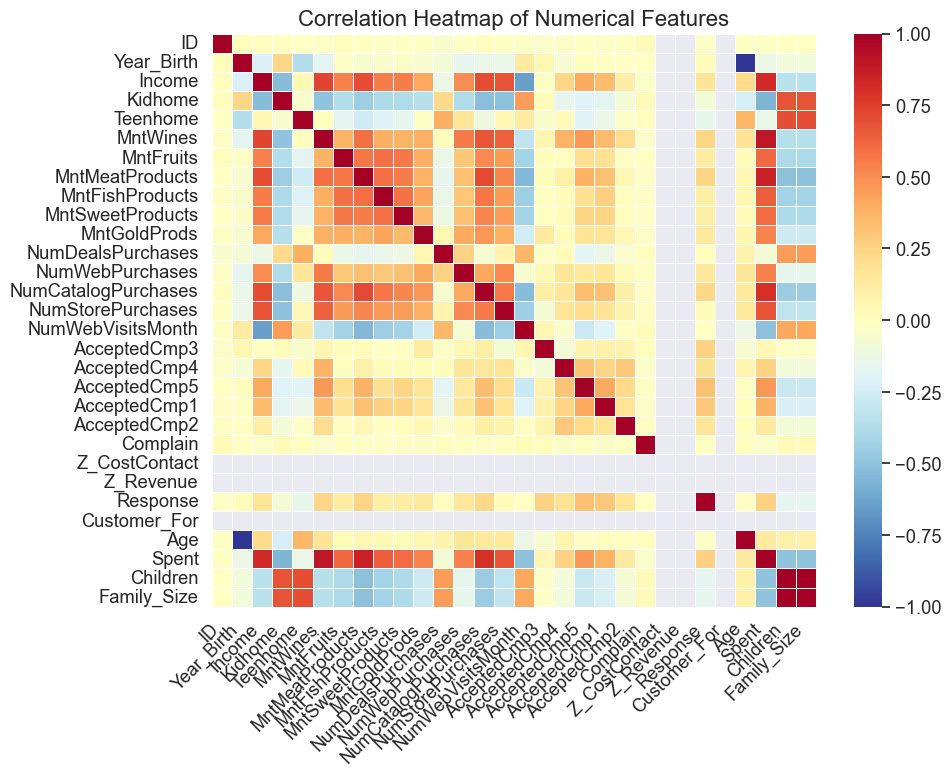

In [58]:
#5.

# Επιλογή των αριθμητικών χαρακτηριστικών
numerical_features = df.select_dtypes(include='number')

# Υπολογισμός του πίνακα συσχέτισης
correlation_matrix = numerical_features.corr()

# Εκτύπωση του πίνακα συσχέτισης
sns.set(font_scale=1.2)  # Αύξηση του μεγέθους των γραμμάτων
plt.figure(figsize=(10, 8))  # Ορισμός του μεγέθους του γραφήματος
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', annot=False, fmt='.2f', linewidths=0.5, annot_kws={"fontsize": 12})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)  # Τίτλος γραφήματος
plt.xticks(rotation=45, ha='right')  # Περιστροφή των ετικετών του άξονα x για καλύτερη αναγνωσιμότητα
plt.yticks(rotation=0)  # Οριζοντιοποίηση των ετικετών του άξονα y
plt.tight_layout()  # Βελτιστοποίηση του layout
plt.show()

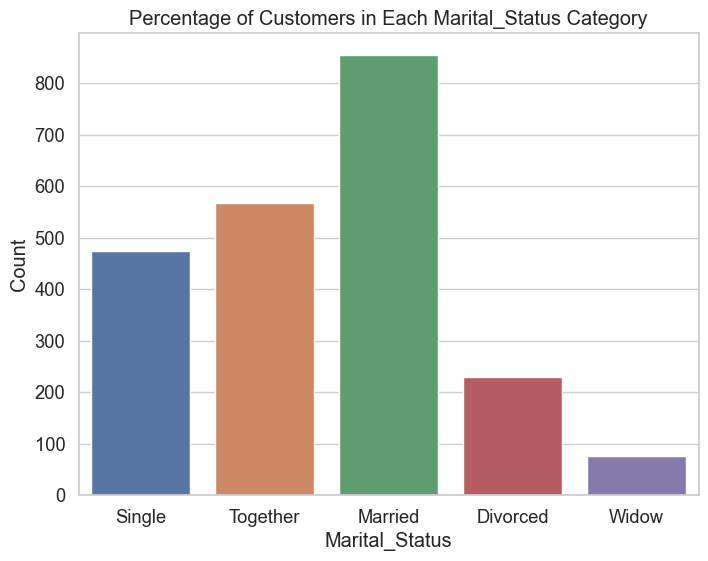

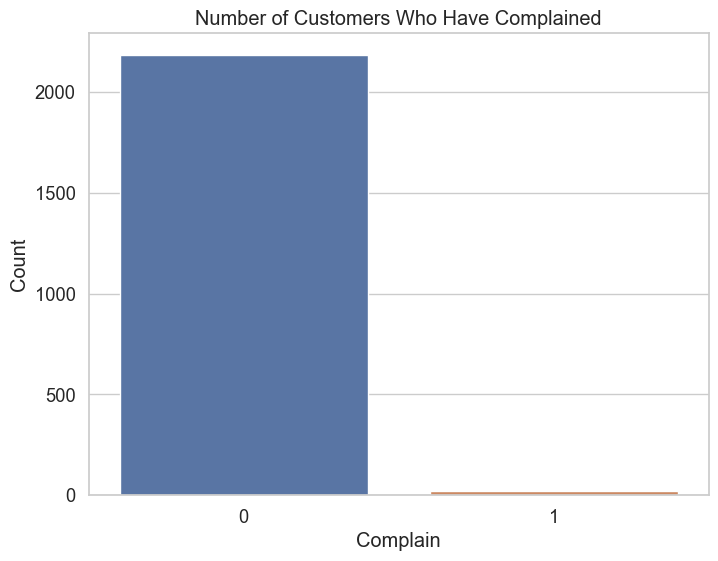

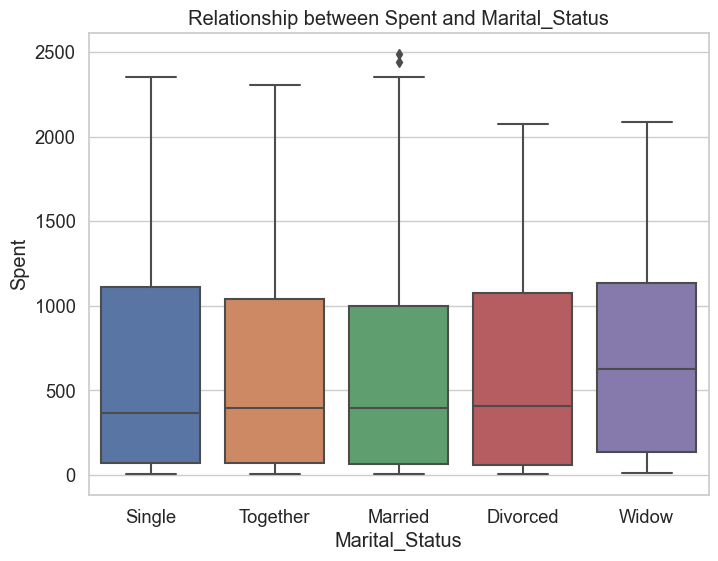

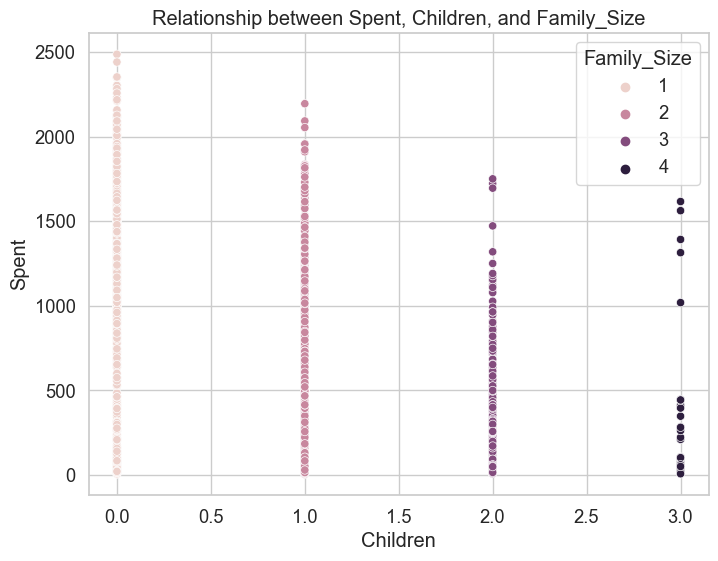

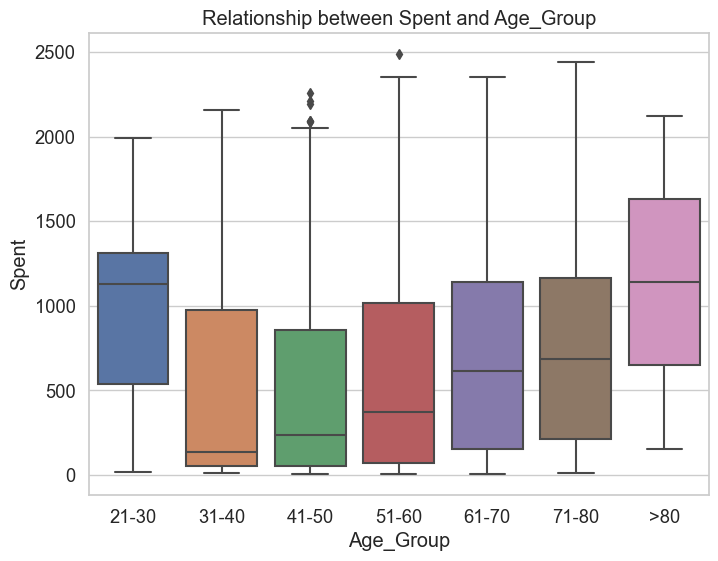

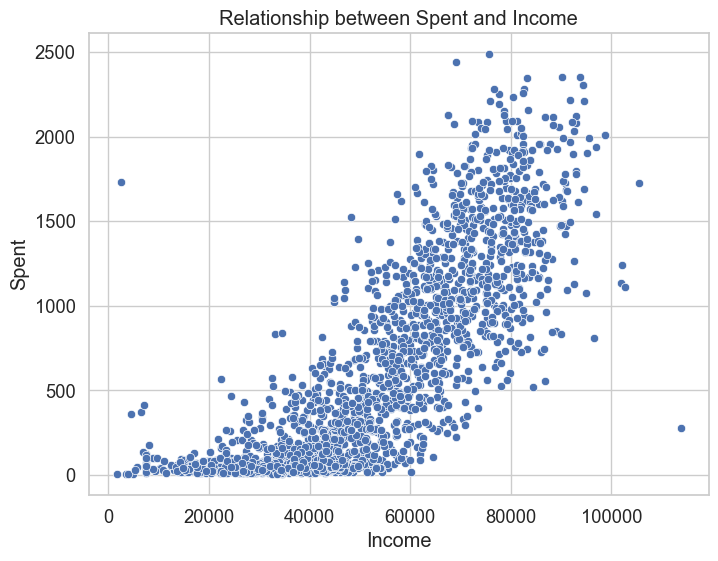

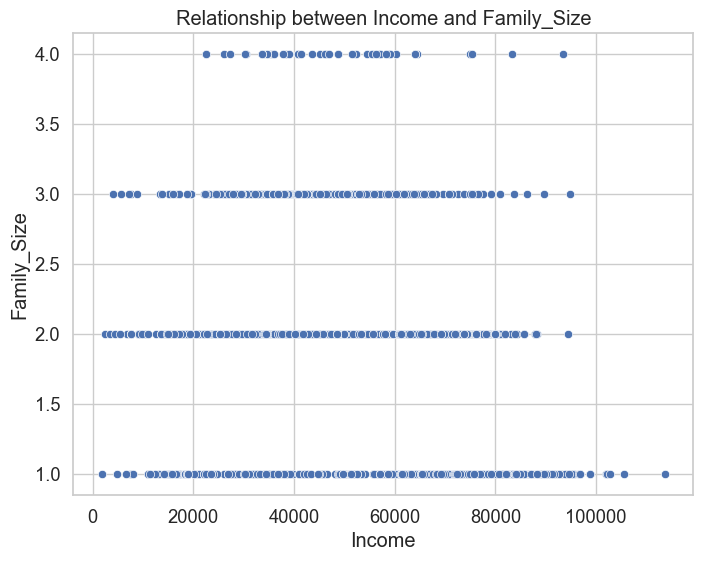

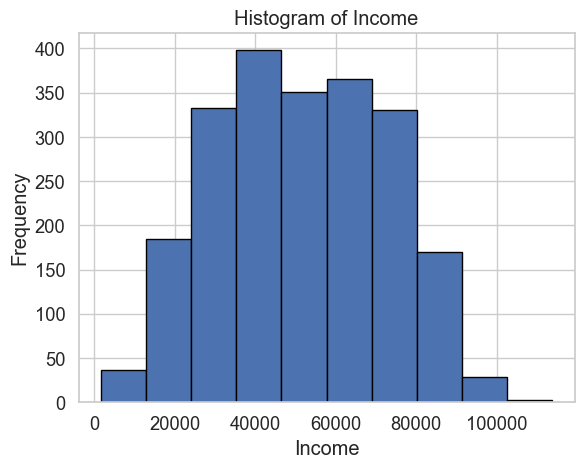

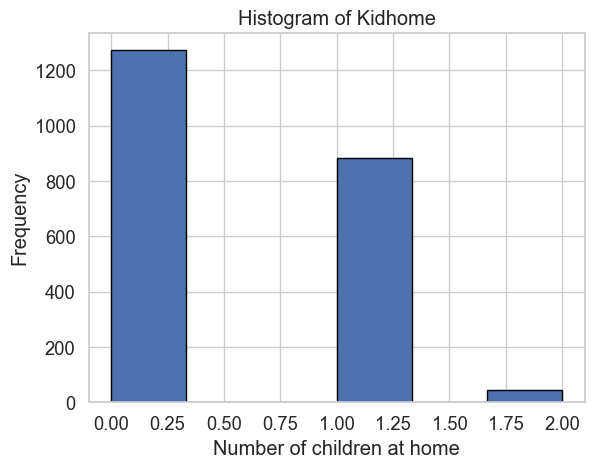

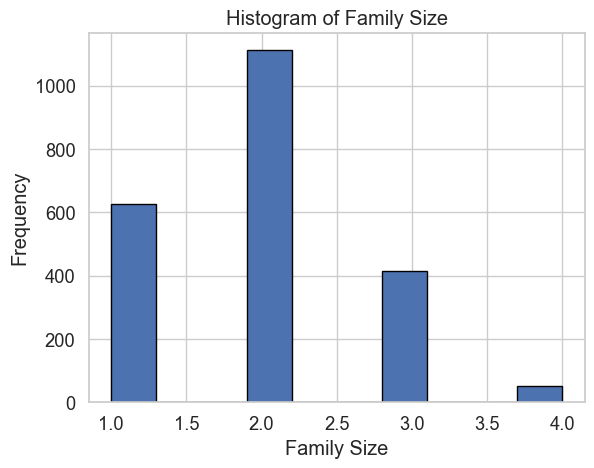

In [59]:
#6.

# 1. 
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x="Marital_Status", data=df)
plt.title("Percentage of Customers in Each Marital_Status Category")
plt.xlabel("Marital_Status")
plt.ylabel("Count")
plt.show()

# 2. 
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x="Complain", data=df)
plt.title("Number of Customers Who Have Complained")
plt.xlabel("Complain")
plt.ylabel("Count")
plt.show()

# 3. 
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Marital_Status", y="Spent", data=df)
plt.title("Relationship between Spent and Marital_Status")
plt.xlabel("Marital_Status")
plt.ylabel("Spent")
plt.show()

# 4.
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Children", y="Spent", hue="Family_Size", data=df)
plt.title("Relationship between Spent, Children, and Family_Size")
plt.xlabel("Children")
plt.ylabel("Spent")
plt.show()

# 5. 
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.boxplot(x="Age_Group", y="Spent", data=df)
plt.title("Relationship between Spent and Age_Group")
plt.xlabel("Age_Group")
plt.ylabel("Spent")
plt.show()

# 6. 
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Income", y="Spent", data=df)
plt.title("Relationship between Spent and Income")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.show()

# 8. 
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x="Income", y="Family_Size", data=df)
plt.title("Relationship between Income and Family_Size")
plt.xlabel("Income")
plt.ylabel("Family_Size")
plt.show()

# 15. 
df['Income'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

# 16.
df['Kidhome'].plot(kind='hist', bins=6, edgecolor='black')
plt.xlabel('Number of children at home')
plt.ylabel('Frequency')
plt.title('Histogram of Kidhome')
plt.show()

# 17. 
df['Family_Size'].plot(kind='hist', bins=10, edgecolor='black')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.title('Histogram of Family Size')
plt.show()


     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               2  58138.0        0         0   
1  2174        1954          2               2  46344.0        1         1   
2  4141        1965          2               3  71613.0        0         0   
3  6182        1984          2               3  26646.0        1         0   
4  5324        1981          4               1  58293.0        1         0   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0       635         88              546  ...                  4   
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  Z_CostContact  Z_Revenue  Customer_For  Age  Spent  \
0                  7              3         11      

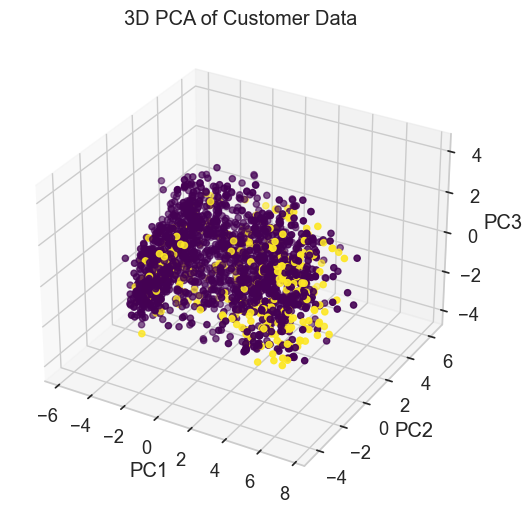

In [60]:
# 7.

# Μετατροπή κατηγορικών χαρακτηριστικών με το one hot encoding
cat_cols = ['Education', 'Marital_Status', 'Living_With']
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Δημιουργία ενός αντίγραφου του dataframe με μόνο αριθμητικές στήλες και διαγρaφή των στηλών που σχετίζονται με προσφορές και προωθητικές ενέργειες
temp = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                  'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], 
                 axis=1)

# Αντιγραφή του dataframe και επιλογή μόνο των αριθμητικών στηλών
num_df = temp.select_dtypes(include=['int', 'float']).copy()

print(num_df.head())

# Standardization των δεδομένων
scaler = StandardScaler()
num_df_std = scaler.fit_transform(num_df)

# PCA με n_components=3
pca = PCA(n_components=3)
pca.fit(num_df_std)
pca_df = pca.transform(num_df_std)


# Σχεδίαση της τρισδιάστατης προβολής του αποτελέσματος
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=df['Response'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of Customer Data')
plt.show()




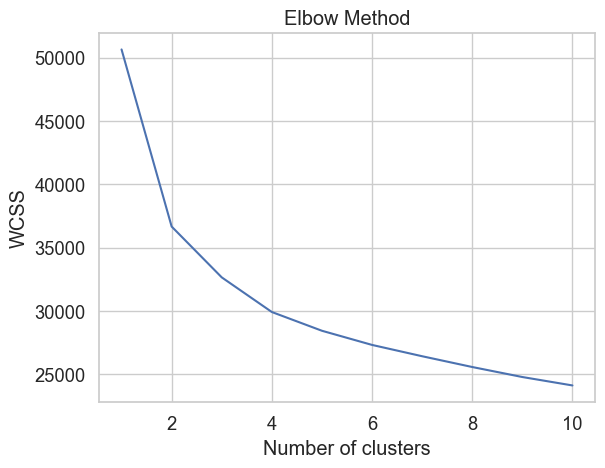

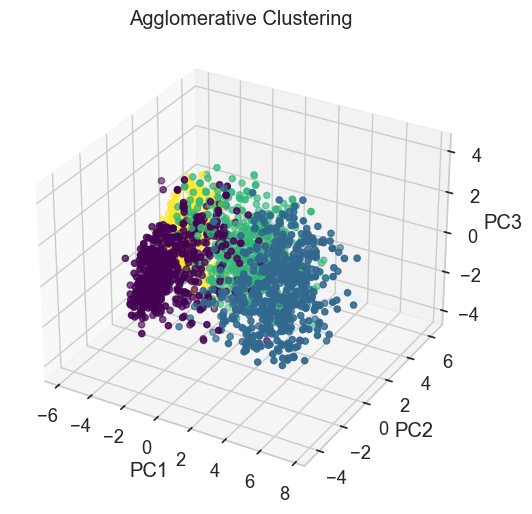

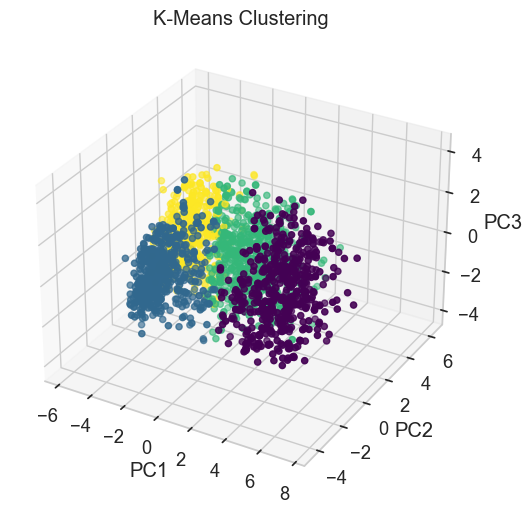

In [61]:
# 8.

# Εφαρμογή της μεθόδου Elbow προσδιορισμό του αριθμού των συστάδων που πρέπει να σχηματιστούν
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(num_df_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Εφαρμογή Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(num_df_std)

# Εφαρμογή K-Means Clustering
kmeans_clustering = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans_clustering.fit_predict(num_df_std)

# Εμφάνιση των σχηματιζόμενων συστάδων με PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=agg_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Agglomerative Clustering')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-Means Clustering')
plt.show()
